# Dataset Description

The dataset used for this project is the ISIC 2019 Challenge Dataset, which includes dermoscopic images of skin lesions with associated metadata and ground truth labels.

[ISIC 2019 Dataset](https://challenge.isic-archive.com/landing/2019/)

The dataset contains images categorized into the following classes:
- Melanoma (MEL)
- Melanocytic nevus (NV)
- Basal cell carcinoma (BCC)
- Actinic keratosis (AK)
- Benign keratosis (BKL)
- Dermatofibroma (DF)
- Vascular lesion (VASC)
- Squamous cell carcinoma (SCC)

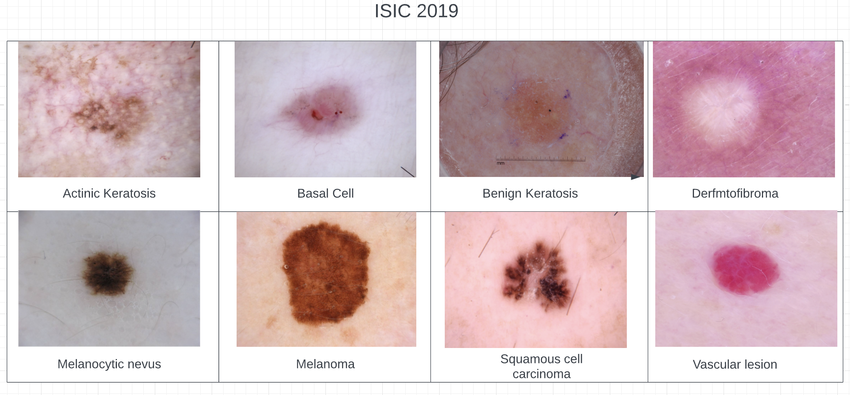

This project involves the classification of skin lesions using a pre-trained DenseNet121 model. The project incldudes preprocessing filtered ISIC2019 dataset, model training, evaluating model performance providing a comprehensive assessment of its ability to accurately identify different types of skin lesions.


# Exploratory Data Analysis (EDA)

This section includes loading and transforming the data, visualizing distributions of key features, and displaying a subset of images with their class labels.


In [ ]:
import pandas as pd

# Load the CSV files
metadata_df = pd.read_csv('/kaggle/input/isic2019-filtered-dataset/Filtered_ISIC_2019_Training_Metadata.csv')
groundtruth_df = pd.read_csv('/kaggle/input/isic2019-filtered-dataset/Filtered_ISIC_2019_Training_GroundTruth.csv')


print('Metadata csv:\n',metadata_df.head())
print('\n')
print('Ground Truth csv:\n', groundtruth_df.head())

Metadata csv:
           image  age_approx anatom_site_general lesion_id     sex
0  ISIC_0000000        55.0      anterior torso       NaN  female
1  ISIC_0000001        30.0      anterior torso       NaN  female
2  ISIC_0000002        60.0     upper extremity       NaN  female
3  ISIC_0000003        30.0     upper extremity       NaN    male
4  ISIC_0000004        80.0     posterior torso       NaN    male


Ground Truth csv:
           image  MEL  NV  BCC  AK  BKL  DF  VASC  SCC
0  ISIC_0000000    0   1    0   0    0   0     0    0
1  ISIC_0000001    0   1    0   0    0   0     0    0
2  ISIC_0000002    1   0    0   0    0   0     0    0
3  ISIC_0000003    0   1    0   0    0   0     0    0
4  ISIC_0000004    1   0    0   0    0   0     0    0


In [ ]:
print(groundtruth_df.columns)


Index(['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'], dtype='object')


**Combining Class Labels** Combining the binary class labels into a single column simplifies the data and makes it easier to work with. This is particularly useful for visualization and modeling tasks where a single label is needed.

**Data Cleanup:** Dropping the original binary columns helps reduce redundancy in the DataFrame and keeps the focus on the combined class labels.

**Data Transformation:** Saving the transformed data to a new CSV file ensures that the cleaned and processed data is readily available for subsequent analysis and modeling steps.

In [ ]:
# Define a function to create a combined class label
def create_combined_class(row):
    classes = []
    if row['MEL'] == 1:
        classes.append('MEL')
    if row['NV'] == 1:
        classes.append('NV')
    if row['BCC'] == 1:
        classes.append('BCC')
    if row['AK'] == 1:
        classes.append('AK')
    if row['BKL'] == 1:
        classes.append('BKL')
    if row['DF'] == 1:
        classes.append('DF')
    if row['VASC'] == 1:
        classes.append('VASC')
    if row['SCC'] == 1:
        classes.append('SCC')
    return ','.join(classes)

# Apply the function to create a new column
groundtruth_df['combined_class'] = groundtruth_df.apply(create_combined_class, axis=1)

# Drop the original binary columns
binary_columns = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']
groundtruth_df = groundtruth_df.drop(columns=binary_columns)

# Save the transformed data to a new CSV file
new_file_path = '/kaggle/working/ground_truth_v1.csv'
groundtruth_df.to_csv(new_file_path, index=False)

print(f"Transformed data saved to {new_file_path}")


Transformed data saved to /kaggle/working/ground_truth_v1.csv


Let's visualize the distribution of various features in the dataset, including the combined class labels, sex, anatomical site, and age, using Seaborn and Matplotlib.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


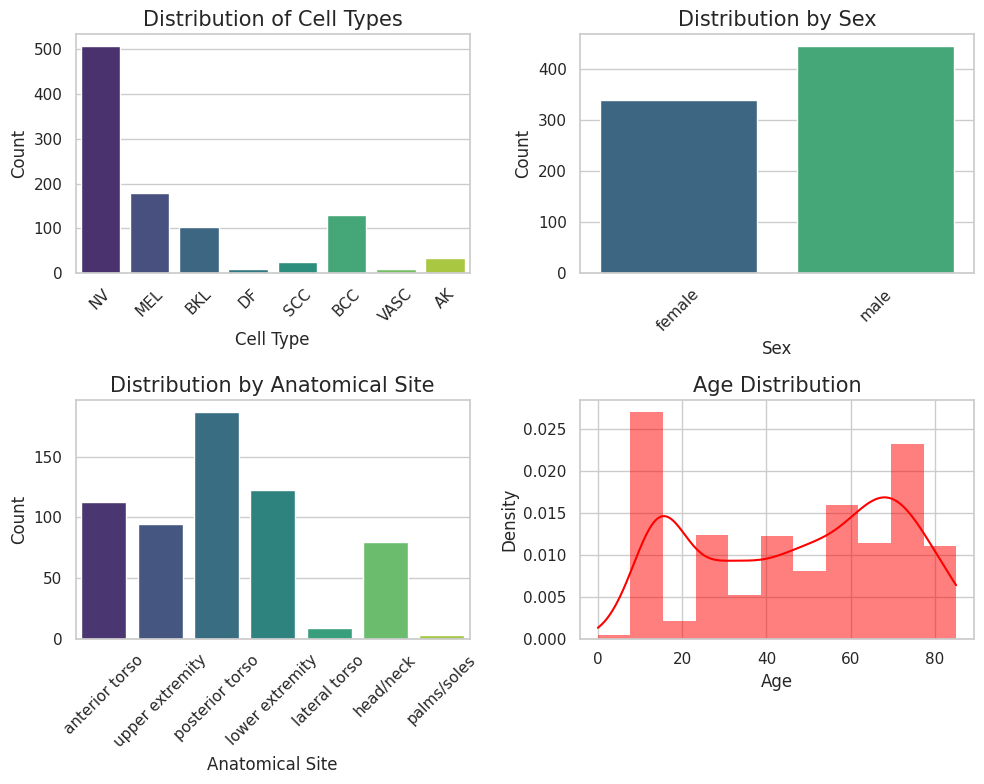

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Setting the style and palette for the plots
sns.set(style="whitegrid")

# Data distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot for Cell Type
sns.countplot(data=groundtruth_df, x='combined_class', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].set_xlabel('Cell Type', fontsize=12)
axes[0, 0].set_title('Distribution of Cell Types', fontsize=15)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot for Sex
sns.countplot(data=metadata_df, x='sex', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_ylabel('Count', fontsize=12)
axes[0, 1].set_xlabel('Sex', fontsize=12)
axes[0, 1].set_title('Distribution by Sex', fontsize=15)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot for Anatomical Site
sns.countplot(data=metadata_df, x='anatom_site_general', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].set_xlabel('Anatomical Site', fontsize=12)
axes[1, 0].set_title('Distribution by Anatomical Site', fontsize=15)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot for Age
sample_age = metadata_df[pd.notnull(metadata_df['age_approx'])]
sns.histplot(sample_age['age_approx'], kde=True, ax=axes[1, 1], color='red', stat="density", linewidth=0)
axes[1, 1].set_ylabel('Density', fontsize=12)
axes[1, 1].set_xlabel('Age', fontsize=12)
axes[1, 1].set_title('Age Distribution', fontsize=15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Displaying a subset of images from the dataset along with their corresponding class labels using Matplotlib.

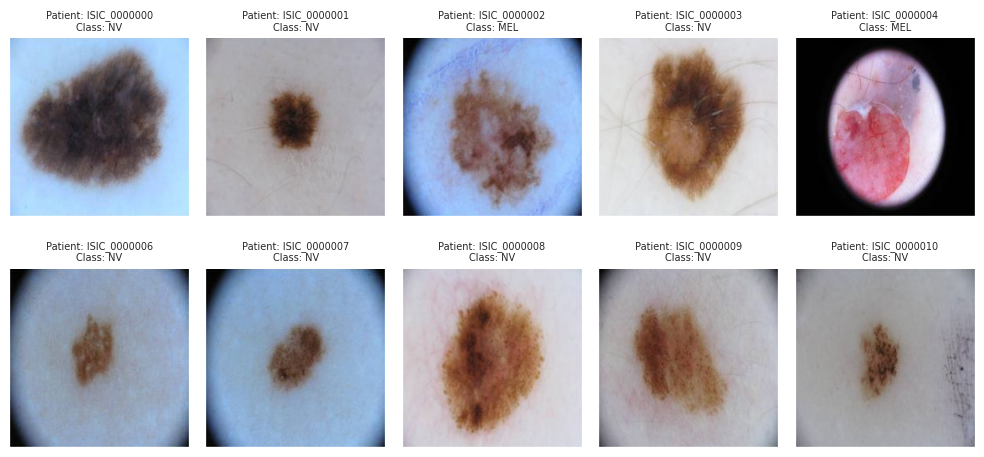

In [ ]:
#reading images from the folder corresponding to the groundtruth csv
import matplotlib.pyplot as plt
from PIL import Image
import os

# Path to the folder containing the images
image_folder = '/kaggle/input/isic2019-filtered-dataset/Images/Images/'

# Number of images to display
num_images = 10

# Select a subset of the DataFrame
sample_df = groundtruth_df.head(num_images)

# Create a plot
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the DataFrame and plot images
for i, (index, row) in enumerate(sample_df.iterrows()):
    image_path = os.path.join(image_folder, row['image'] + '.jpg')  # Adjust extension if necessary

    # Read the image
    img = Image.open(image_path)

    # Display the image
    axes[i].imshow(img)
    axes[i].set_title(f"Patient: {row['image']}\nClass: {row['combined_class']}", fontsize=7)

    axes[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Label Encoding

The LabelEncoder from scikit-learn is used to convert categorical text labels into numeric labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(groundtruth_df['combined_class'])
LabelEncoder()
#print(list(le.classes_))

#combined_df['label'] = le.transform(combined_df["combined_class"])
#print(combined_df.sample(10))

# Display the mapping of labels to integers
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)



Label Mapping: {'AK': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'SCC': 6, 'VASC': 7}


combined_class
NV      508
MEL     179
BCC     131
BKL     104
AK       34
SCC      25
VASC     10
DF        9
Name: count, dtype: int64


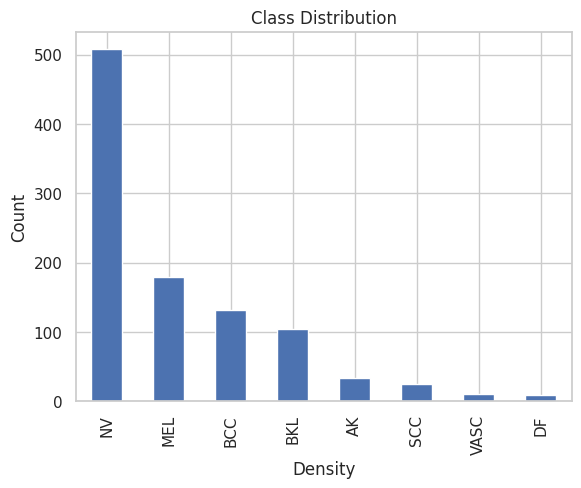

In [ ]:
# Assuming 'density' is the target variable
class_counts = groundtruth_df['combined_class'].value_counts()
print(class_counts)

# Visualize class distribution
class_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel('Density')
plt.ylabel('Count')
plt.show()


The above class distribution indicates high imbalance in the dataset

In [ ]:
groundtruth_df['label'] = le.transform(groundtruth_df['combined_class'])
print(groundtruth_df.sample(10))


                        image combined_class  label
84   ISIC_0000091_downsampled             NV      5
203              ISIC_0000217             NV      5
359  ISIC_0000409_downsampled             NV      5
42   ISIC_0000044_downsampled             NV      5
131  ISIC_0000139_downsampled            MEL      4
410              ISIC_0000481             NV      5
579  ISIC_0004115_downsampled             NV      5
231              ISIC_0000247             NV      5
703  ISIC_0012207_downsampled            BKL      2
957              ISIC_0026282            BCC      1


**SANITY CHECK:** To make sure that the images corresponding to the csv are correct

In [ ]:
# Ensure the 'image' column has the correct filenames with .jpg extension
groundtruth_df['image'] = groundtruth_df['image'].apply(lambda x: x + '.jpg')

# Check if all images exist in the specified directory
image_folder = '/kaggle/input/isic2019-filtered-dataset/Images/Images/'  # Make sure this is the correct path to the images folder
missing_files = []

for image_name in groundtruth_df['image']:
    if not os.path.exists(os.path.join(image_folder, image_name)):
        missing_files.append(image_name)

if missing_files:
    print(f"Missing files: {len(missing_files)}")
    print(missing_files[:10])  # Print first 10 missing files for inspection
else:
    print("All files found.")

All files found.


# Dataset Preprocessing

## 1. Stratified Sampling
As the dataset is highly imbalanced, I am using stratified sampling to ensure balanced representation of each class in training, validation and testing set

## 2. Oversampling
This will increase instances of minority classes to balance the dataset

## 3. Custom Data Generator
Inspired by [SIIM-ISIC Melanoma Classification Challenge 1st Place Winner Solution](https://www.youtube.com/watch?v=wXEDf0TFatA), I have employed a custom dtaa generator to load, preprocess and augment images in batches during training








In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import os


In [ ]:
# Perform stratified sampling with train, validation, and test sets
train_val_df, test_df = train_test_split(groundtruth_df, test_size=0.2, stratify=groundtruth_df['combined_class'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, stratify=train_val_df['combined_class'], random_state=42)  # 0.25 * 0.8 = 0.2

# Oversampling the training set
ros = RandomOverSampler(random_state=42)
train_df_resampled, train_labels_resampled = ros.fit_resample(train_df, train_df['combined_class'])

# Convert back to DataFrame
train_df_resampled['combined_class'] = train_labels_resampled


In [ ]:
# Print class distribution in training and validation sets
print("Training set class distribution:")
print(train_df_resampled['combined_class'].value_counts())
print("\nValidation set class distribution:")
print(val_df['combined_class'].value_counts())
print("\nTest set class distribution:")
print(test_df['combined_class'].value_counts())


Training set class distribution:
combined_class
NV      305
MEL     305
DF      305
BCC     305
AK      305
BKL     305
SCC     305
VASC    305
Name: count, dtype: int64

Validation set class distribution:
combined_class
NV      102
MEL      36
BCC      26
BKL      21
AK        7
SCC       5
VASC      2
DF        1
Name: count, dtype: int64

Test set class distribution:
combined_class
NV      101
MEL      36
BCC      26
BKL      21
AK        7
SCC       5
DF        2
VASC      2
Name: count, dtype: int64


In [ ]:
# Print the number of images in each set
print(f"Number of images in the training set: {len(train_df_resampled)}")
print(f"Number of images in the validation set: {len(val_df)}")
print(f"Number of images in the test set: {len(test_df)}")
print(f"Number of images in the original training set before resampling: {len(train_df)}")


Number of images in the training set: 2440
Number of images in the validation set: 200
Number of images in the test set: 200
Number of images in the original training set before resampling: 600


In [ ]:
import albumentations as A
import cv2
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.utils import Sequence

# Define the augmentations
train_transform = A.Compose([
    A.Transpose(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.MotionBlur(p=0.5),
    A.MedianBlur(blur_limit=3, p=0.5),
    A.GaussianBlur(blur_limit=3, p=0.5),
    A.GaussNoise(p=0.5),
    A.OpticalDistortion(p=0.5),
    A.ElasticTransform(p=0.5),
    A.CLAHE(p=0.5),
    A.HueSaturationValue(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    #A.Cutout(num_holes=8, max_h_size=8, max_w_size=8, p=0.5)
])



/opt/conda/lib/python3.10/site-packages/albumentations/augmentations/blur/transforms.py:180: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  warnings.warn(


In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.utils import Sequence

# Custom Data Generator
class ISICDataGenerator(Sequence):
    def __init__(self, dataframe, image_dir, batch_size, img_size, n_classes, transform=None, shuffle=True):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.n_classes = n_classes
        self.transform = transform
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_data = [self.dataframe.iloc[k] for k in indexes]
        X, y = self.__data_generation(batch_data)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.dataframe))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_data):
        X = np.empty((self.batch_size, *self.img_size, 3))
        y = np.empty((self.batch_size), dtype=int)

        for i, data in enumerate(batch_data):
            img_path = os.path.join(self.image_dir, data['image'])
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            label = data['label']

            if self.transform:
                augmented = self.transform(image=image)
                image = augmented['image']

            X[i,] = image / 255.0
            y[i] = label

        return X, tf.keras.utils.to_categorical(y, num_classes=self.n_classes)

# Parameters
batch_size = 32
img_size = (224, 224)
n_classes = len(groundtruth_df['label'].unique())

# Create train and validation generators
train_generator = ISICDataGenerator(dataframe=train_df_resampled, image_dir=image_folder,
                                    batch_size=batch_size, img_size=img_size, n_classes=n_classes,
                                    transform=train_transform)

val_generator = ISICDataGenerator(dataframe=val_df, image_dir=image_folder,
                                  batch_size=batch_size, img_size=img_size, n_classes=n_classes,
                                  transform=None)  # No augmentation for validation set

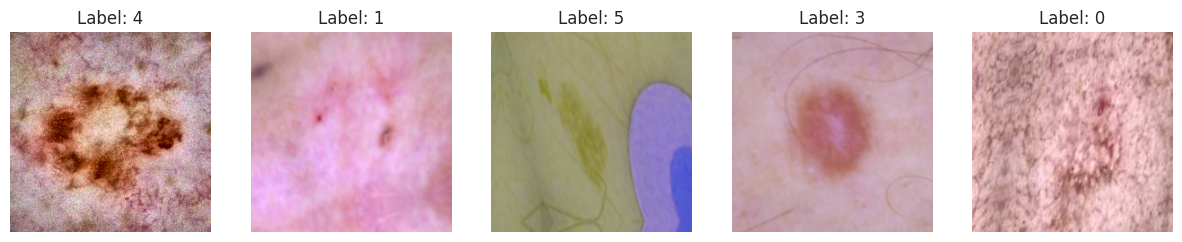

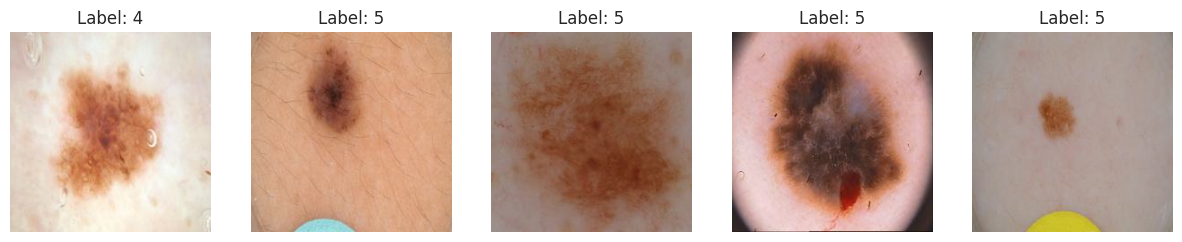

In [ ]:
import matplotlib.pyplot as plt

def visualize_generator(generator, num_images=5):
    # Get a batch of images and labels from the generator
    images, labels = next(iter(generator))

    # Define the number of images to display
    num_images = min(num_images, len(images))

    # Plot the images with their labels
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis("off")
    plt.show()

# Visualize images from the training generator
visualize_generator(train_generator)

# Visualize images from the validation generator
visualize_generator(val_generator)





In [ ]:
# Get the unique classes
unique_classes = groundtruth_df['label'].unique()
print(f"Unique classes: {unique_classes}")
num_classes = len(unique_classes)

Unique classes: [5 4 2 3 6 1 7 0]


# Model Training

For this project, DenseNet121 provided the best validation accuracy

DenseNet121 is pre-trained on the ImageNet dataset, which means it has already learned a wide range of features from a diverse set of images. Using this pre-trained model allows us to leverage these features and apply them to our specific task of skin cancer classification, reducing the need for extensive training and computational resources.


- **Input Layer:** 224 x 224 x 3 (RGB Image)
- **Convolutional Layers:** Multiple dense blocks with convolutional layers, each receiving input from all preceding layers within the block.
- **Transition Layers:** Convolution and pooling layers between dense blocks to reduce dimensions.
- **Global Average Pooling Layer:** Reduces the feature maps to a single vector per image.
- **Dense Layer:** Fully connected layer with 1024 units and ReLU activation.
- **Output Layer:** Fully connected layer with softmax activation for multi-class classification.



In [ ]:
# Define the DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(n_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 8,095,304 (30.88 MB)

 Trainable params: 1,057,800 (4.04 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('EfficientNetB0_best_model.keras', monitor='val_loss', save_best_only=True)

In [ ]:
import time
from datetime import timedelta

# Record the start time
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)

# Record the end time
end_time = time.time()

# Calculate the difference
elapsed_time = end_time - start_time

# Format the time difference
formatted_time = str(timedelta(seconds=int(elapsed_time)))
print(f'Training time: {formatted_time}')


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/76 ━━━━━━━━━━━━━━━━━━━━ 56:01 45s/step - accuracy: 0.1562 - loss: 2.2391

I0000 00:00:1722626108.107175      92 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722626108.183027      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4682 - loss: 1.4745

W0000 00:00:1722626198.537644      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


76/76 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.4695 - loss: 1.4708 - val_accuracy: 0.5938 - val_loss: 1.1017 - learning_rate: 0.0010
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.6734 - loss: 0.8442 - val_accuracy: 0.5938 - val_loss: 1.0103 - learning_rate: 0.0010
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.7320 - loss: 0.7286 - val_accuracy: 0.7292 - val_loss: 0.8273 - learning_rate: 0.0010
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.7452 - loss: 0.6820 - val_accuracy: 0.7135 - val_loss: 0.8064 - learning_rate: 0.0010
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.7583 - loss: 0.6487 - val_accuracy: 0.7188 - val_loss: 0.7585 - learning_rate: 0.0010
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.7846 - loss: 0.5851 - val_accuracy: 0.6667 - val_loss: 0.8563 - learning_rate: 0.0010
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.7862 - loss: 0.5755 - val_accuracy: 0.7083 - v

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Save the trained model
model.save('/kaggle/working/DenseNet121_trained_model_50_epochs.keras')
print('Model saved as DenseNet121_trained_model_50_epochs.keras')

# Find the best epoch
best_epoch = np.argmin(history.history['val_loss']) + 1
print(f'Best epoch: {best_epoch}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.7375 - loss: 0.7718
Validation Loss: 0.792608916759491
Validation Accuracy: 0.7135416865348816
Model saved as DenseNet121_trained_model_50_epochs.keras
Best epoch: 5


In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Model Testing

* **Model Loading:** Load pre-trained DenseNet121 model for predictions.
* **Test Data Preparation:** Read, resize, normalize images, and convert labels to categorical format.
* **Prediction Generation:** Make predictions on the test dataset.
* **Confusion Matrix:** Visualize actual vs. predicted class distributions.
* **Classification Report:** Provide precision, recall, and f1-score for each class.
* **AUC Calculation:** Compute AUC for each class and macro-average AUC.
* **ROC Curves:** Plot ROC curves to show the trade-off between true positive and false positive rates for each class.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/kaggle/working/DenseNet121_trained_model_50_epochs.keras')


In [ ]:
import cv2
import numpy as np
import os

# Load test images and labels
def load_images_and_labels(df, image_dir, img_size):
    images = []
    labels = []
    for index, row in df.iterrows():
        img_path = os.path.join(image_dir, row['image'])
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, img_size)
        images.append(image)
        labels.append(row['label'])
    images = np.array(images) / 255.0  # Normalize images
    labels = tf.keras.utils.to_categorical(labels, num_classes=len(df['label'].unique()))
    return images, labels

# Load test images and labels
test_images, test_labels = load_images_and_labels(test_df, image_folder, img_size)


3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step 

W0000 00:00:1722627614.894072      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step


<Figure size 1200x1200 with 0 Axes>

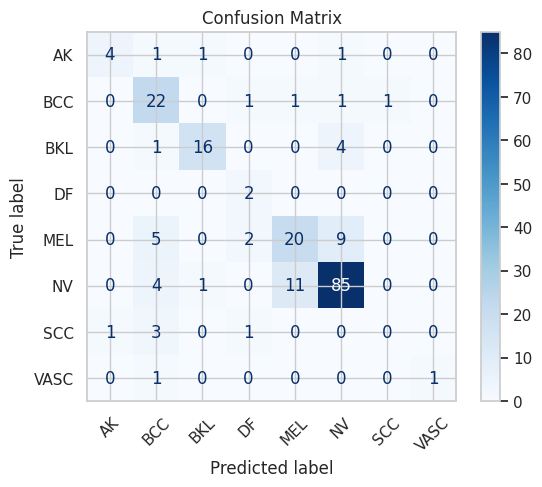

Classification Report:

              precision    recall  f1-score   support

          AK       0.80      0.57      0.67         7
         BCC       0.59      0.85      0.70        26
         BKL       0.89      0.76      0.82        21
          DF       0.33      1.00      0.50         2
         MEL       0.62      0.56      0.59        36
          NV       0.85      0.84      0.85       101
         SCC       0.00      0.00      0.00         5
        VASC       1.00      0.50      0.67         2

    accuracy                           0.75       200
   macro avg       0.64      0.63      0.60       200
weighted avg       0.75      0.75      0.74       200



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
test_predictions = model.predict(test_images)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_classes, test_pred_classes)

# Plot the confusion matrix
labels = list(np.unique(train_df_resampled['combined_class']))  # Assuming 'combined_class' has your class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Display the confusion matrix
plt.figure(figsize=(12, 12))
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title("Confusion Matrix")
plt.show()

# Generate and print the classification report
class_report = classification_report(test_true_classes, test_pred_classes, target_names=labels)
print("Classification Report:\n")
print(class_report)


AUC for class 0: 0.9970
AUC for class 1: 0.9664
AUC for class 2: 0.9409
AUC for class 3: 1.0000
AUC for class 4: 0.8609
AUC for class 5: 0.9272
AUC for class 6: 0.8041
AUC for class 7: 1.0000
Macro-average AUC: 0.9371


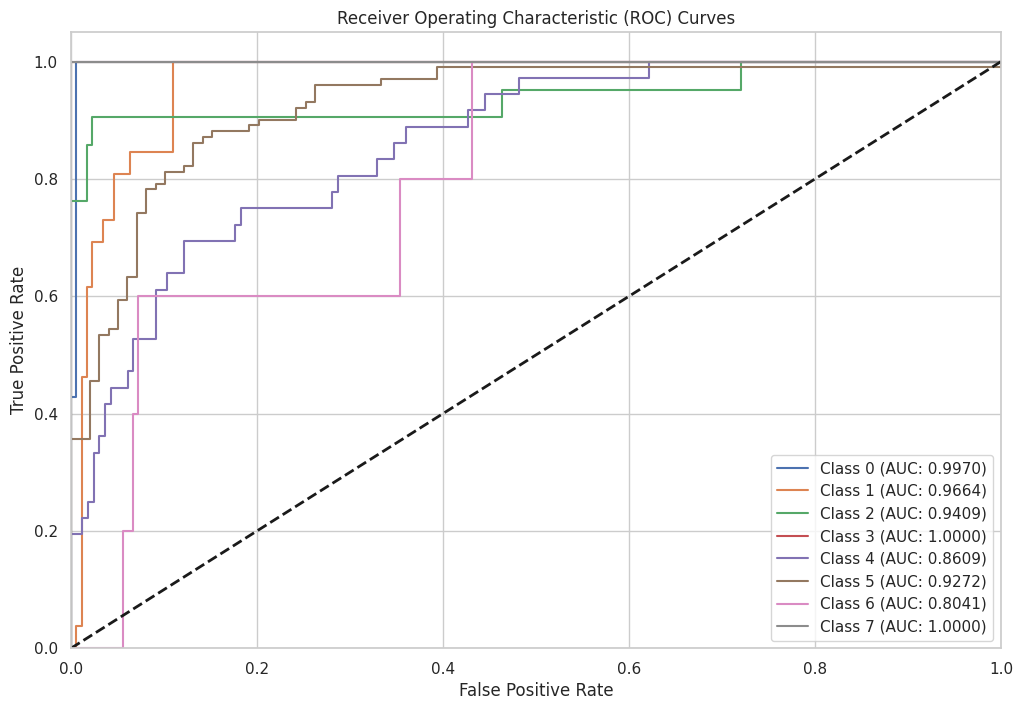

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.80      0.57      0.67         7
     Class 1       0.59      0.85      0.70        26
     Class 2       0.89      0.76      0.82        21
     Class 3       0.33      1.00      0.50         2
     Class 4       0.62      0.56      0.59        36
     Class 5       0.85      0.84      0.85       101
     Class 6       0.00      0.00      0.00         5
     Class 7       1.00      0.50      0.67         2

    accuracy                           0.75       200
   macro avg       0.64      0.63      0.60       200
weighted avg       0.75      0.75      0.74       200



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


# Calculate AUC for each class
n_classes = test_predictions.shape[1]
auc_scores = []
for i in range(n_classes):
    auc_score = roc_auc_score(test_true_classes == i, test_predictions[:, i])
    auc_scores.append(auc_score)
    print(f'AUC for class {i}: {auc_score:.4f}')

# Calculate macro-average AUC
macro_auc = roc_auc_score(test_true_classes, test_predictions, multi_class='ovr', average='macro')
print(f'Macro-average AUC: {macro_auc:.4f}')

# Plot ROC curves for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(test_true_classes == i, test_predictions[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC: {auc_scores[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Generate and print the classification report
class_report = classification_report(test_true_classes, test_pred_classes, target_names=[f'Class {i}' for i in range(n_classes)])
print("Classification Report:\n")
print(class_report)